In [3]:
import os
import sys
import pandas as pd
import numpy as np
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [4]:
ZIPdf = pd.read_pickle('../../data/analysis/ZIPprofiles.pkl')

In [5]:
ZIPdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 02224 to nan
Data columns (total 12 columns):
business_id           1461 non-null int64
is_open               1461 non-null int64
%closed               1461 non-null float64
review_count          1461 non-null float64
tipcount              1461 non-null float64
checkins              1461 non-null float64
open_stars            1426 non-null float64
std.dev_open_stars    1145 non-null float64
closed_stars          919 non-null float64
open_categories       1461 non-null object
closed_categories     1461 non-null object
name                  1461 non-null object
dtypes: float64(7), int64(2), object(3)
memory usage: 148.4+ KB


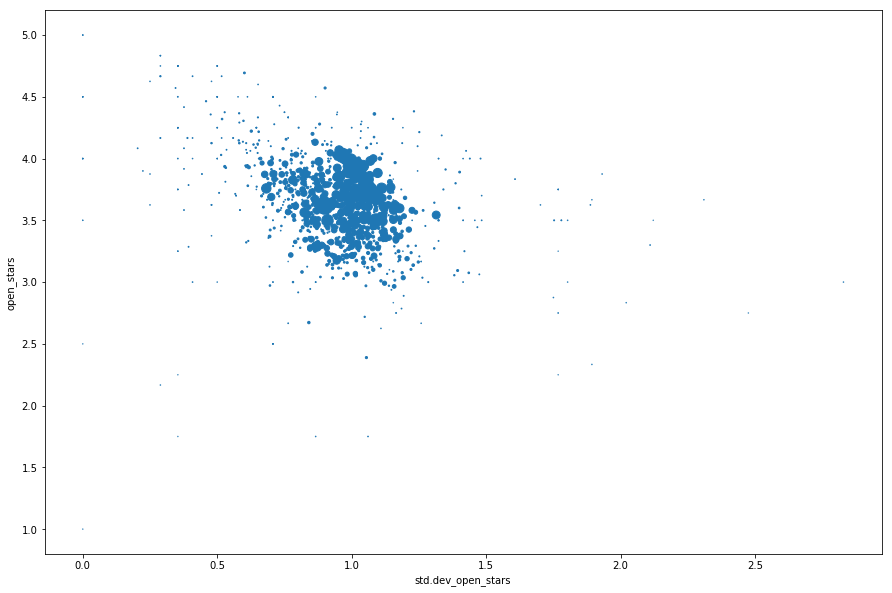

In [6]:
ZIPdf.plot.scatter(x = 'std.dev_open_stars', y = 'open_stars', s = ZIPdf.business_id/10, figsize = (15,10))

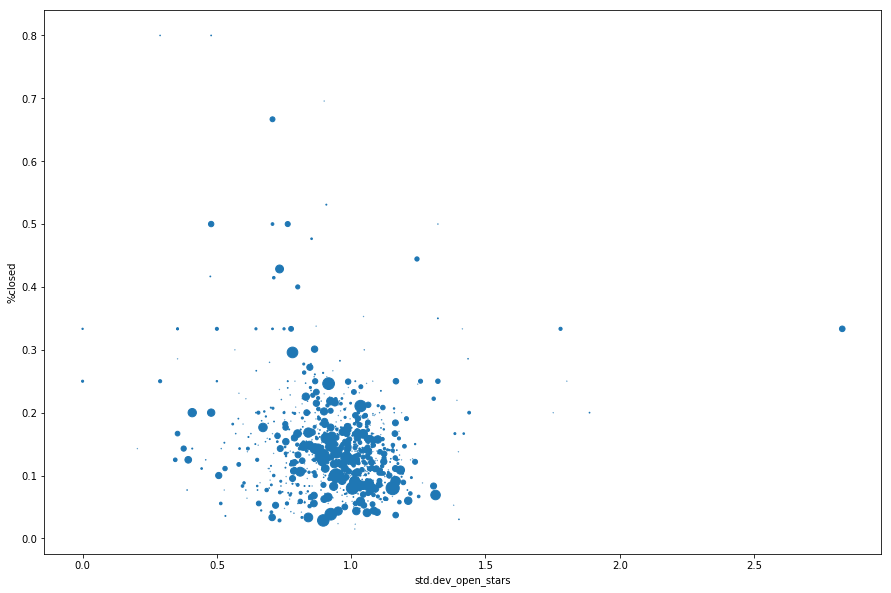

In [7]:

ZIPdf[ZIPdf['%closed']>0].plot(kind = 'scatter', x = 'std.dev_open_stars', y = '%closed', figsize = (15,10), s = ZIPdf.business_id/10)

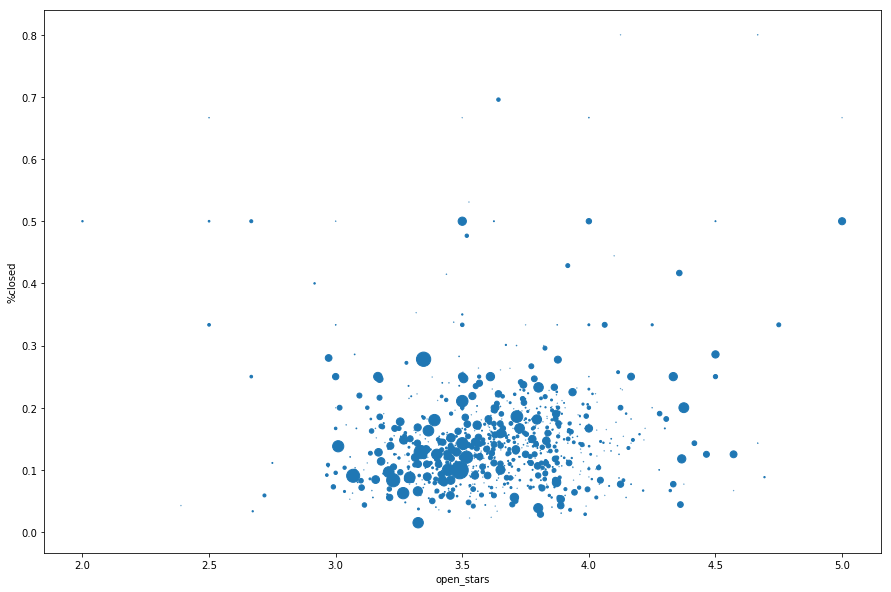

In [8]:
ZIPdf[ZIPdf['%closed'] > 0].plot(kind = 'scatter', y = '%closed', x = 'open_stars', figsize = (15,10), s = ZIPdf.business_id/10)

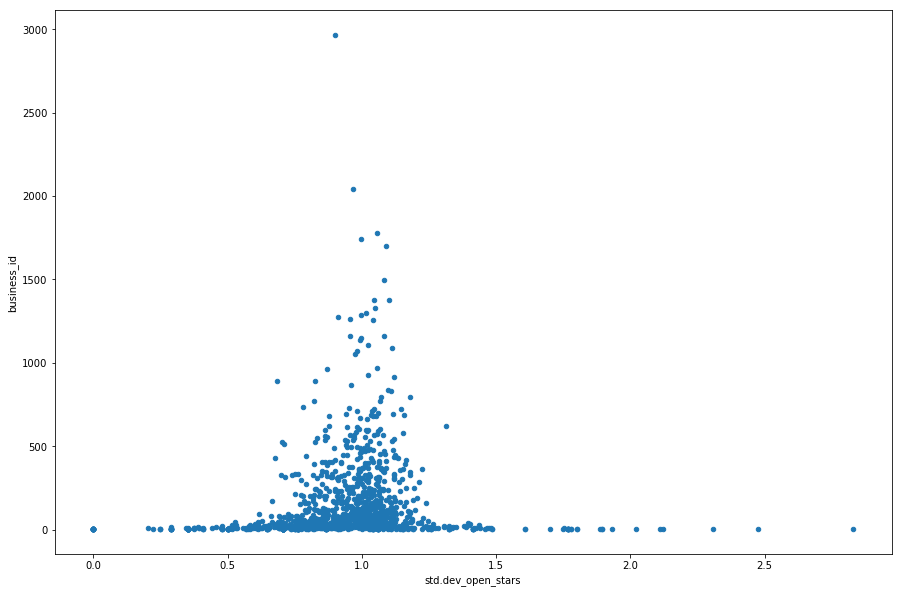

In [30]:

ZIPdf[ZIPdf['review_count']>0].plot(kind = 'scatter', x = 'std.dev_open_stars', y = 'business_id', figsize = (15,10))

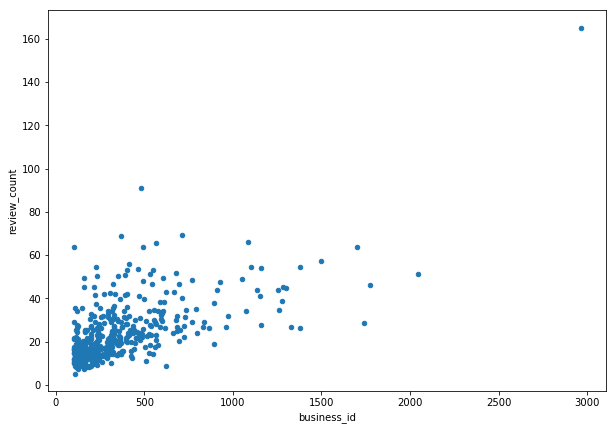

In [10]:
ZIPdf[ZIPdf['business_id']>100].plot(kind = 'scatter', x = 'business_id', y = 'review_count', figsize = (10,7))

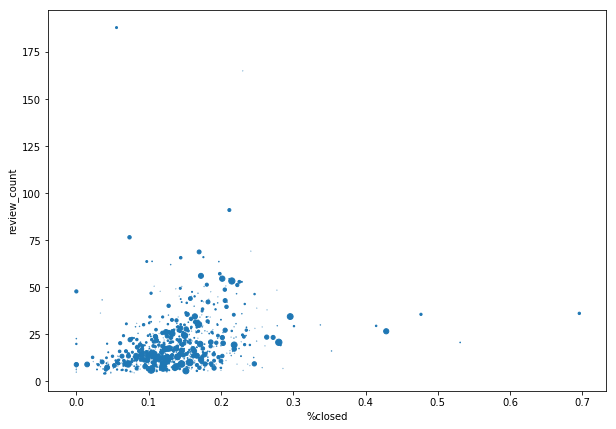

In [37]:
ZIPdf[ZIPdf['business_id'] > 20].plot(kind = 'scatter', x = '%closed', y = 'review_count', figsize = (10,7), s = ZIPdf.business_id/20)

In [33]:
#I think;
#- For Areas that have any closed businesses, open_stars %closed correlated.


ZIPmask = (ZIPdf['%closed'] > 0) & (ZIPdf['business_id'] > 100) & (ZIPdf['review_count'] > 20)
ZIPdf[ZIPmask].corr(method='pearson', min_periods=1)

,business_id,is_open,%closed,review_count,tipcount,checkins,open_stars,std.dev_open_stars,closed_stars
business_id,1.000000,0.996448,0.239116,0.512532,0.445019,0.482467,0.192653,0.112830,0.098415
is_open,0.996448,1.000000,0.175839,0.489388,0.438298,0.473898,0.202155,0.154848,0.102393
%closed,0.239116,0.175839,1.000000,0.249023,0.078246,0.059250,-0.030516,-0.495116,-0.054810
review_count,0.512532,0.489388,0.249023,1.000000,0.889239,0.884497,0.194925,-0.075825,0.208839
tipcount,0.445019,0.438298,0.078246,0.889239,1.000000,0.940710,0.191463,0.129379,0.238483
checkins,0.482467,0.473898,0.059250,0.884497,0.940710,1.000000,0.186417,0.113497,0.193795
open_stars,0.192653,0.202155,-0.030516,0.194925,0.191463,0.186417,1.000000,-0.061650,0.643771
std.dev_open_stars,0.112830,0.154848,-0.495116,-0.075825,0.129379,0.113497,-0.061650,1.000000,0.071125
closed_stars,0.098415,0.102393,-0.054810,0.208839,0.238483,0.193795,0.643771,0.071125,1.000000
